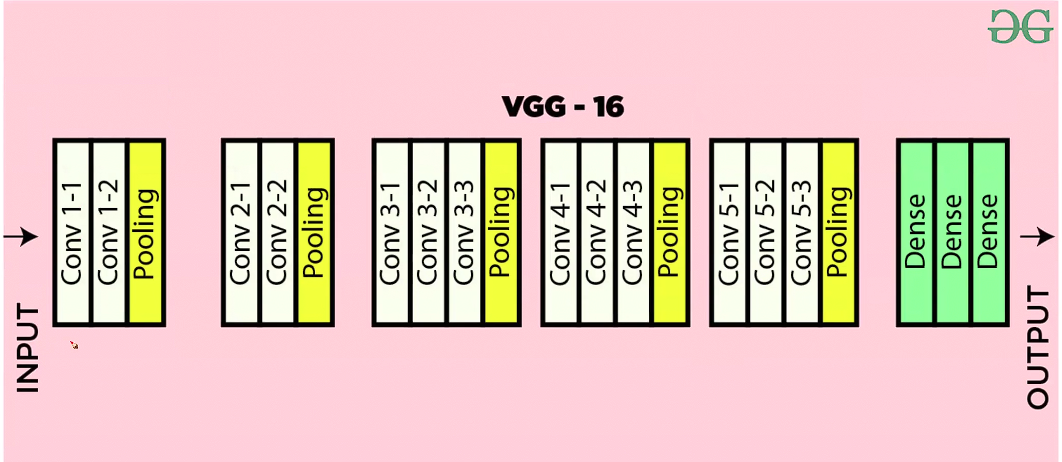

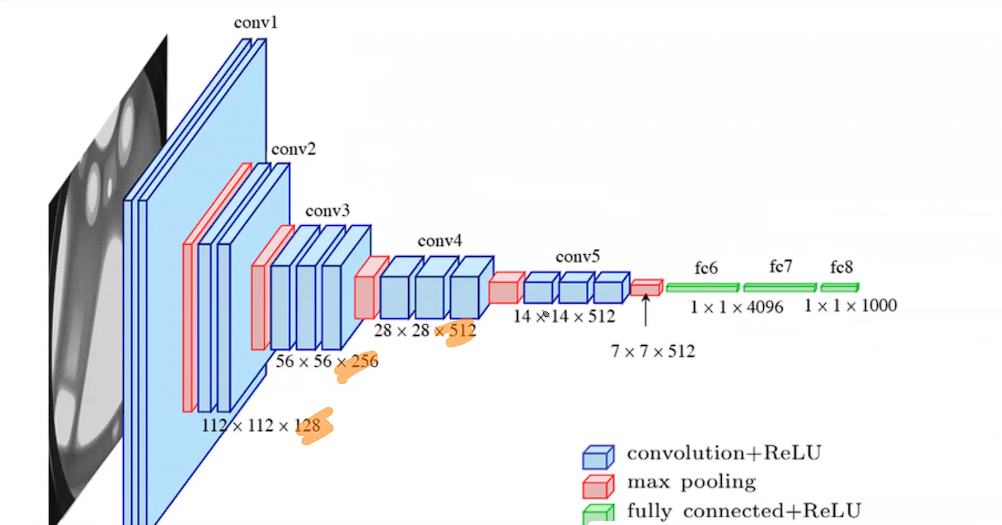

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

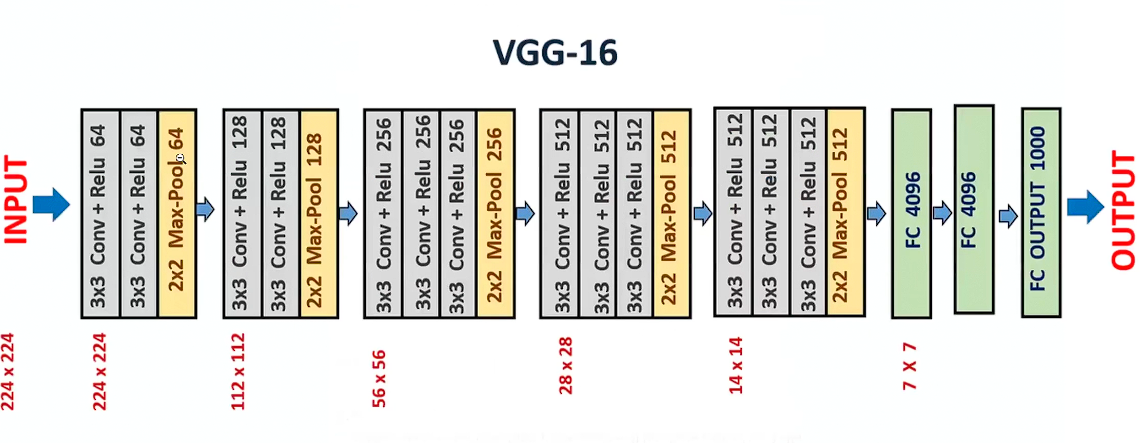

In [ ]:
#Modifying VGG 16 architecture basis our dataset.

In [ ]:
model = Sequential()
#Block - 1

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Block - 2

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Block - 3

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


#Flatten
model.add(Flatten())

#Fully Connected Layer

model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 1, 1, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 358,186 (1.37 MB)

 Trainable params: 358,186 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 207ms/step - accuracy: 0.2454 - loss: 1.9547 - val_accuracy: 0.5033 - val_loss: 1.3542
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 200s 205ms/step - accuracy: 0.5104 - loss: 1.3469 - val_accuracy: 0.5725 - val_loss: 1.1878
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 204ms/step - accuracy: 0.5880 - loss: 1.1519 - val_accuracy: 0.6301 - val_loss: 1.0243
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 204ms/step - accuracy: 0.6321 - loss: 1.0273 - val_accuracy: 0.6721 - val_loss: 0.9469
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 205ms/step - accuracy: 0.6700 - loss: 0.9405 - val_accuracy: 0.6808 - val_loss: 0.9230


### We can give more more epochs to improve accuracy and also we can apply Batch normalization along with dropout to reduce the model complexity